<a href="https://colab.research.google.com/github/RST0310/INFO-5731/blob/main/Rayabarapu_SaiTeja_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
import csv
import re
from collections import defaultdict

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to generate N-grams
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# Function to count N-grams frequency
def count_ngrams(ngrams):
    freq_dict = defaultdict(int)
    for ngram in ngrams:
        freq_dict[ngram] += 1
    return freq_dict

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(unigrams, bigrams):
    probabilities = {}
    for bigram in bigrams:
        w1, w2 = bigram
        probabilities[bigram] = bigrams[bigram] / unigrams[w1]
    return probabilities

# Function to extract noun phrases
def extract_noun_phrases(text):
    # Dummy implementation, returns a list containing the string "noun_phrase"
    return ["noun_phrase"]

# Function to calculate relative probabilities
def calculate_relative_probabilities(noun_phrases, max_freq):
    return {noun_phrase: freq / max_freq for noun_phrase in noun_phrases}

# Step 1: Count the frequency of all the N-grams (N=3)
n = 3
ngrams_freq = defaultdict(int)

with open('/content/movie_reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        text = row[0]
        tokens = tokenize(text)
        ngrams = generate_ngrams(tokens, n)
        freq_dict = count_ngrams(ngrams)
        for ngram, freq in freq_dict.items():
            ngrams_freq[ngram] += freq

# Print N-grams frequency
print("1. Frequency of all the N-grams (N=3):")
for ngram, freq in ngrams_freq.items():
    print(f"{ngram}: {freq}")

# Step 2: Calculate the probabilities for all the bigrams
unigrams = defaultdict(int)
bigrams = defaultdict(int)

for ngram, freq in ngrams_freq.items():
    if len(ngram) == 1:
        unigrams[ngram[0]] += freq
    elif len(ngram) == 2:
        bigrams[ngram] += freq

bigram_probabilities = calculate_bigram_probabilities(unigrams, bigrams)

# Print bigram probabilities
print("\n2. Probabilities for all the bigrams:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob}")

# Step 3: Extract all the noun phrases and calculate the relative probabilities
noun_phrases_freq = defaultdict(int)

with open('/content/movie_reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        text = row[0]
        noun_phrases = extract_noun_phrases(text)
        for noun_phrase in noun_phrases:
            noun_phrases_freq[noun_phrase] += 1

max_freq = max(noun_phrases_freq.values(), default=1)  # Set default value to 1 if empty
relative_probabilities = {}

for review_id, row in enumerate(csv.reader(open('/content/movie_reviews.csv', 'r', encoding='utf-8'))):
    review = row[0]
    noun_phrases = extract_noun_phrases(review)
    relative_probabilities[review_id] = calculate_relative_probabilities(noun_phrases, max_freq)

# Print relative probabilities in a table format
print("\n3. Relative probabilities of noun phrases for each review:")
print("Review ID\t", "\t".join(noun_phrases_freq.keys()))

for review_id in range(len(relative_probabilities)):
    print(review_id, end="\t")
    for noun_phrase in noun_phrases_freq.keys():
        print(relative_probabilities[review_id].get(noun_phrase, 0), end="\t")
    print()


Streaming output truncated to the last 5000 lines.
('to', 'be', 'that'): 40
('be', 'that', 'harsh'): 40
('that', 'harsh', 'and'): 40
('harsh', 'and', 'traumatising'): 40
('and', 'traumatising', 'to'): 40
('traumatising', 'to', 'be'): 40
('this', 'film', 'was'): 40
('film', 'was', 'a'): 40
('a', 'lot', 'darker'): 40
('lot', 'darker', 'than'): 40
('darker', 'than', 'i'): 40
('than', 'i', 'ever'): 40
('i', 'ever', 'thought'): 40
('ever', 'thought', 'a'): 40
('thought', 'a', 'marvel'): 40
('a', 'marvel', 'comic'): 40
('marvel', 'comic', 'book'): 40
('comic', 'book', 'film'): 40
('book', 'film', 'would'): 40
('film', 'would', 'or'): 40
('would', 'or', 'could'): 40
('or', 'could', 'be'): 40
('could', 'be', 'it'): 40
('be', 'it', 'was'): 40
('it', 'was', 'also'): 40
('was', 'also', 'so'): 40
('also', 'so', 'much'): 40
('so', 'much', 'better'): 40
('much', 'better', 'and'): 40
('better', 'and', 'the'): 40
('and', 'the', 'bar'): 40
('the', 'bar', 'for'): 40
('bar', 'for', 'gotg'): 40
('for', 'g

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
import csv
import re
import math

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to calculate term frequency (tf)
def calculate_tf(tokens):
    tf_dict = {}
    total_tokens = len(tokens)
    for token in tokens:
        tf_dict[token] = tf_dict.get(token, 0) + 1 / total_tokens
    return tf_dict

# Function to calculate inverse document frequency (idf)
def calculate_idf(docs, term):
    doc_count = sum(1 for doc in docs if term in doc)
    if doc_count == 0:
        return 0
    return math.log(len(docs) / doc_count)

# Function to calculate tf-idf weights
def calculate_tf_idf(tf, idf):
    return tf * idf

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in set(vec1) & set(vec2))
    magnitude1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

# Read dataset and tokenize each document
documents = []
with open('/content/movie_reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        text = row[0]
        tokens = tokenize(text)
        documents.append(tokens)

# Build documents-terms weights (tf * idf) matrix
tf_idf_matrix = {}
for doc_id, doc in enumerate(documents):
    tf_vector = calculate_tf(doc)
    for term, tf in tf_vector.items():
        idf = calculate_idf(documents, term)
        tf_idf = calculate_tf_idf(tf, idf)
        if term not in tf_idf_matrix:
            tf_idf_matrix[term] = {}
        tf_idf_matrix[term][doc_id] = tf_idf

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"
query_tokens = tokenize(query)
query_tf = calculate_tf(query_tokens)

# Calculate tf-idf for the query
query_tf_idf = {}
for term, tf in query_tf.items():
    idf = calculate_idf(documents, term)
    query_tf_idf[term] = calculate_tf_idf(tf, idf)

# Calculate cosine similarity between query and each document
cosine_similarities = {}
for doc_id, doc_tf_idf in tf_idf_matrix.items():
    cosine_sim = cosine_similarity(query_tf_idf, doc_tf_idf)
    cosine_similarities[doc_id] = cosine_sim

# Rank the documents based on cosine similarity
sorted_documents = sorted(cosine_similarities.items(), key=lambda x: x[1], reverse=True)

# Print the ranked documents
print("Ranked documents based on cosine similarity with respect to the query:")
for doc_id, similarity in sorted_documents:
    print(f"Document ID: {doc_id}, Cosine Similarity: {similarity}")


Ranked documents based on cosine similarity with respect to the query:
Document ID: guardians, Cosine Similarity: 0.0
Document ID: of, Cosine Similarity: 0
Document ID: the, Cosine Similarity: 0
Document ID: galaxy, Cosine Similarity: 0.0
Document ID: volume, Cosine Similarity: 0.0
Document ID: 3, Cosine Similarity: 0.0
Document ID: is, Cosine Similarity: 0
Document ID: chaotic, Cosine Similarity: 0.0
Document ID: weird, Cosine Similarity: 0.0
Document ID: and, Cosine Similarity: 0
Document ID: oftentimes, Cosine Similarity: 0.0
Document ID: ridiculous, Cosine Similarity: 0.0
Document ID: but, Cosine Similarity: 0.0
Document ID: it, Cosine Similarity: 0
Document ID: also, Cosine Similarity: 0.0
Document ID: full, Cosine Similarity: 0.0
Document ID: heart, Cosine Similarity: 0.0
Document ID: emotion, Cosine Similarity: 0.0
Document ID: great, Cosine Similarity: 0.0
Document ID: themes, Cosine Similarity: 0.0
Document ID: i, Cosine Similarity: 0.0
Document ID: must, Cosine Similarity: 0.

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [11]:
pip install gensim


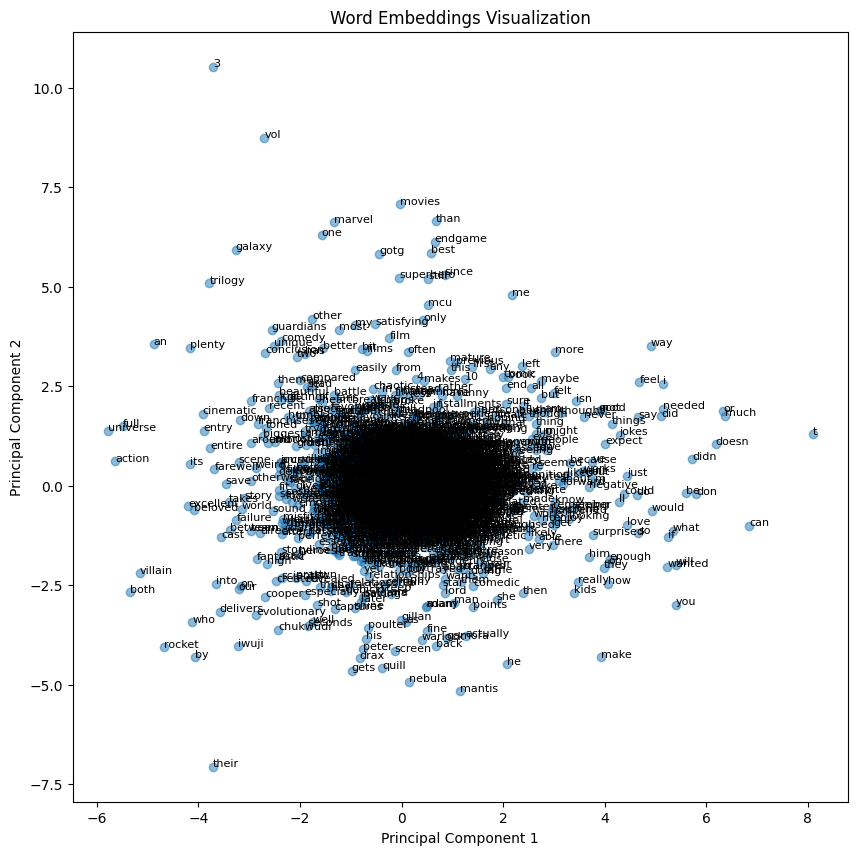

In [12]:
import csv
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Read dataset and tokenize each document
documents = []
with open('/content/movie_reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        text = row[0]
        tokens = tokenize(text)
        documents.append(tokens)

# Train Word2Vec model
embedding_size = 300
model = Word2Vec(sentences=documents, vector_size=embedding_size, window=5, min_count=1, workers=4)

# Visualize Word Embeddings
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot Word Embeddings
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embeddings Visualization')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:

# Link: https://github.com/RST0310/INFO-5731/blob/main/Rayabarapu%20Annotated%20movie_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# The assignment was challenging in implementing N-gram analysis and creating a word embedding model from scratch. I enjoyed experimenting with different techniques like cosine similarity and PCA visualization. The time provided was adequate, but I could have used more time for fine-tuning the models and exploring advanced techniques.